
<h1 style="color: #ed0000; background-color: #0cf7d8; padding: 10px; border-radius: 10px; text-align: center; text-shadow: 3px 3px 9px #ccc;">🧠 Brain Tumor Detection |99% 📊</h1>


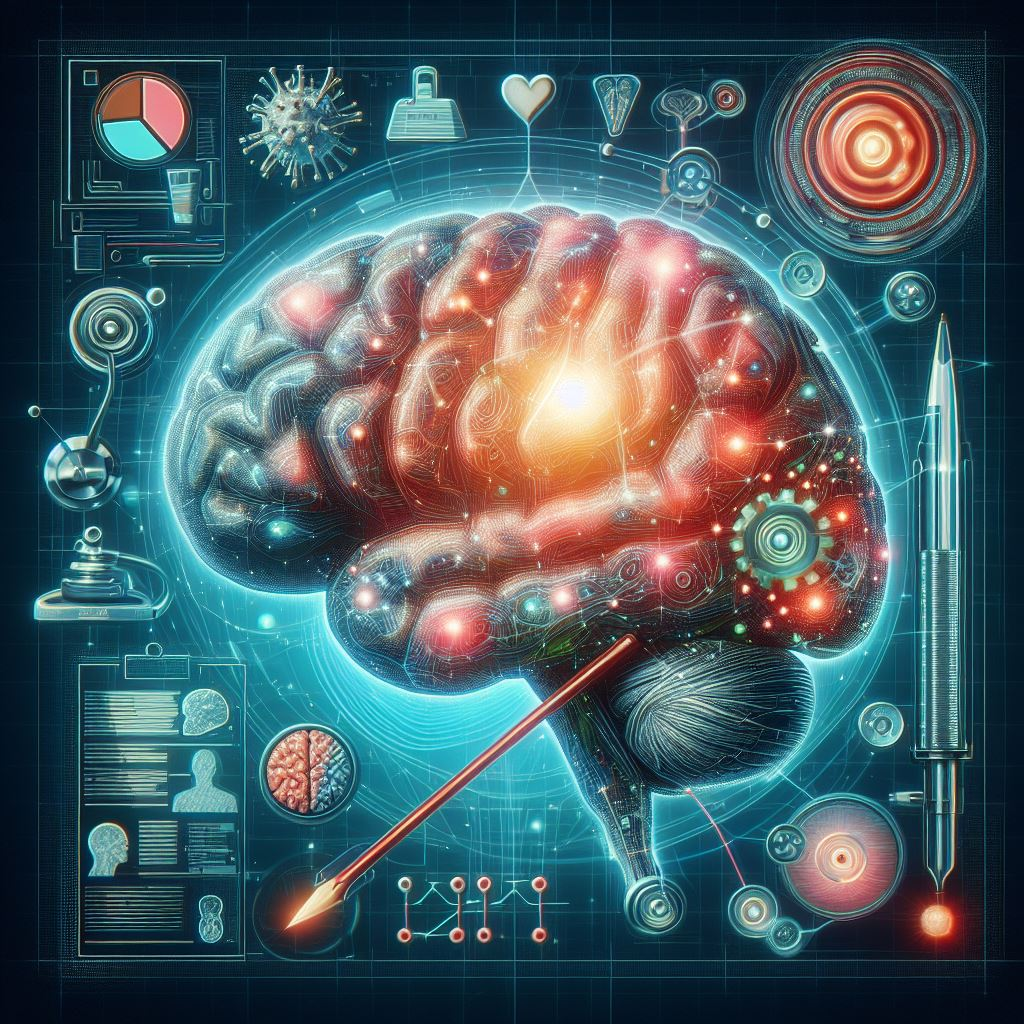


# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">About Author </p>




**Hi Everyone! Welcome to my notebook.**
<p>Greetings! I'm delighted to invite you into my realm of data science exploration and innovation. I'm <b>Zeeshan Younas</b>, a dedicated data scientist with a fervent commitment to unraveling the mysteries concealed within datasets. I leverage the power of machine learning and deep learning to extract meaningful insights and devise impactful solutions.</p>
<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Website</b></th>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Zeeshan5932/Six-month-of-AI-and-data-science-work"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/zeeshan-younas-919a09253/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/zeeshan.younas.2024?mibextid=ZbWKwL"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="mailto:zeeshanoffical01@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Basic introduction </p>


This notebook focuses on brain tumor detection, where only simple and basic methods are employed. Complex techniques are not utilized in this analysis. 🧠💻 The emphasis is on straightforward steps to achieve accurate results, ensuring accessibility and ease of understanding for all users



# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">About Dataset ✨ </p>



 ✔️ Abstract
A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

# ✔️ Context
Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

# ✔️ Definition
To Detect and Classify Brain Tumor using, CNN a; as an asset of Deep Learning and to examine the tumor position(segmentation).

# ✔️ About the data:
The dataset contains 2 folders: yes and no  which contains 3060 Brain MRI Images.

<table>
  <tr>
    <th>Folder</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Yes</td>
    <td>The folder 'yes' contains 1500 Brain MRI Images that are tumorous</td>
  </tr>
  <tr>
    <td>No</td>
    <td>The folder 'no' contains 1500 Brain MRI Images that are non-tumorous</td>
  </tr>
</table>


**Credit goes to** :https://www.kaggle.com/seifwael123


# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Imports and setup Libraries📚 </p>


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')


 
# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Load Dataset </p>



### Basic Preprocessing Steps for Brain Tumor Detection 🧠🔍

After loading the files, the initial preprocessing steps involve:

1. **Converting Color Format:**
   The images are converted from BGR to RGB format since the OpenCV library reads images in BGR by default.

2. **Resizing Images:**
   All images are resized to a predefined size to ensure uniformity and consistency in dimensions.

3. **Organizing Data:**
   The resized images are appended to lists along with their corresponding labels, facilitating easy access and management during subsequent analysis.

In [ ]:
path_No = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/*'
path_Yes = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/*'

tumor = []
no_tumor = []
random_state = 42

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128)) 
    tumor.append((img, 1))  # Appending tuple with image and label 1 (indicating presence of tumor)

for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_tumor.append((img, 0))  # Appending tuple with image and label 0 (indicating absence of tumor)

# Concatenating the two lists and shuffle the data
all_data = tumor + no_tumor


# Splitting data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])



 
# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Exploratary  Data analysis </p>



In [ ]:
plt.figure(figsize=(15, 5))

# Display tumor images with label 'yes'
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(tumor[i][0])  
    plt.title("Tumor: Yes")  
    plt.axis('off')

# Display no_tumor images with label 'no'
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(no_tumor[i][0])  
    plt.title("Tumor: No")  
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Counting the occurrences of each class label
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()



 
# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Data Scaling and Transformation 📊🧠 </p>





Since our data consists of images and images consist of pixels, we divide all the pixel values by 255—each pixel can have a value in [0, 255]— so that all the pixel values are on the same scale i.e. [0, 1].

## Split Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
# Assuming x_train and x_test are your image datasets



# Normalize the pixel values to the range [0, 1]
x_train= x_train /255.0
x_test = x_test / 255.0


In [ ]:
print("Minimum value of the scaled data:", x_train.min())
print("Maximum value of the scaled data:",  x_train.max())


 
# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Build Model </p>



In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback()     

In [ ]:

history = model.fit(x_train, 
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                   callbacks=[back])

# 🎉 **Boom!** 🔥

I have achieved an impressive accuracy of 99%! 🚀

Keep up the fantastic work! 🌟

In [ ]:
# plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
# model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()


In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

In [ ]:
# Assuming 'model' is your trained Keras model
model.save("brain_tumor.h5")



# <p style="color:#f90c0c;text-align:center;font-family:cursive;font-weight: bold;font-size:120%">Conclusion </p>





<p style = "text-shadow: 2px 2px 1px orange ;color:green ;font-family:Segoe Print;font-weight: bold;font-size:250%" > If you have any questions or suggestions, please feel free to leave a comment below. Your input is valuable and greatly appreciated</p>